This uses both PCA and an implementation of an autoencoder to get embeddings for a toy data example.

In [1]:
import autoencoder
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Original data, where each row is a document and each column represents
# a characteristic of the documents. 
data = [[1, 1, 1, 0, 0],
    [2, 2, 2, 0, 0],
    [1, 1, 1, 0, 0],
    [5, 5, 5, 0, 0],
    [0, 0, 0, 2, 2],
    [0, 0, 0, 3, 3],
    [0, 0, 0, 1, 1]]


We augment the original data to 1000 elements by adding Gaussian noise to each repeatedly.

In [2]:
data_aug = []
data_aug_y = []
i = 1
while i < 1000:
    for j in range(len(data)):
        x = data[j]
        data_aug.append([num+np.random.normal() for num in x])
        if j <= 3:
            data_aug_y.append(0)
        else:
            data_aug_y.append(1)
        i += 1
data_aug = np.array(data_aug)

We first use PCA to get the matrix for embedding the values.

In [3]:
u, s, v = np.linalg.svd(data_aug, full_matrices=False)

print "Shape of U: ", u.shape
print "Shape of S: ", s.shape
print "Shape of V: ", v.shape
v = v[:2][:]
# We only want the top two principal components.
print "Shape of truncated V: ", v.shape
print 
print "PCA truncated U: ", u[:][:2]
print "PCA truncated S: ", s[:2][:2]
print "PCA truncated V: ", np.transpose(v[:2][:])


Shape of U:  (1001, 5)
Shape of S:  (5,)
Shape of V:  (5, 5)
Shape of truncated V:  (2, 5)

PCA truncated U:  [[-0.01939581 -0.01285042 -0.02131058 -0.03582388 -0.01440729]
 [-0.03930239 -0.00061977  0.03603325  0.0047081   0.02926952]]
PCA truncated S:  [ 118.99481118   70.44750893]
PCA truncated V:  [[-0.58463781  0.0012152 ]
 [-0.57095951  0.00577246]
 [-0.57631174 -0.00409347]
 [ 0.00461041 -0.70365951]
 [-0.00688435 -0.71050104]]


Now we move on to training the autoencoder.

In [4]:
# Modify format of data to match expected input of autoencoder.
data_aug_modified = []
for point in data_aug:
    data_aug_modified.append([[num] for num in point])
data_aug_modified = np.array(data_aug_modified)

In [5]:
# Train autoencoder with hidden dimension 2.
auto_enc = autoencoder.Autoencoder(5, 2)
auto_enc.sgd(data_aug_modified, 100, 100, 1.0)

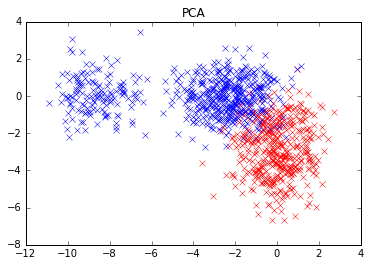

In [6]:
# Plot PCA embeddings of the data
pylab.title("PCA")

# Embed data using PCA.
pca_embed = np.dot(data_aug, v.transpose())
# The two topics are colored differently.
colors = ['b', 'r']
for i in range(len(pca_embed)):
    pylab.plot([pca_embed[i][0]], [pca_embed[i][1]], '%sx' % colors[data_aug_y[i]])


([0.0049779118339769186], [0.12843229004933826])


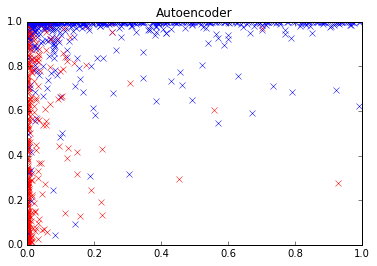

In [7]:
# Embed data using the autoencoder.
autoenc_embed = [auto_enc.feedforward(p, embed=True).transpose()[0] for p in data_aug_modified]
pylab.title("Autoencoder")
colors = ['b', 'r']
for i in range(len(autoenc_embed)):
    pylab.plot([autoenc_embed[i][0]], [autoenc_embed[i][1]], '%sx' % colors[data_aug_y[i]])
print ([autoenc_embed[i][0]], [autoenc_embed[i][1]])

As can be seen, both methods are able to successfully separate the two topics.